### **Importing Libraries:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### **Uploading data:**

In [2]:
df = pd.read_csv('..\data\Churn_Modelling.csv')
df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Cash\AppData\Local\Temp\ipykernel_10556\2189996006.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\Churn_Modelling.csv')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


### **Data Understanding:**

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10002.0,5.001500e+03,2887.472338,1.00,2501.25,5001.50,7.501750e+03,10000.00
CustomerId,10002.0,1.569093e+07,71931.769345,15565701.00,15628524.75,15690732.00,1.575323e+07,15815690.00
CreditScore,10002.0,6.505551e+02,96.661615,350.00,584.00,652.00,7.180000e+02,850.00
Age,10001.0,3.892231e+01,10.487200,18.00,32.00,37.00,4.400000e+01,92.00
Tenure,10002.0,5.012498e+00,2.891973,0.00,3.00,5.00,7.000000e+00,10.00
Balance,10002.0,7.649111e+04,62393.474144,0.00,0.00,97198.54,1.276478e+05,250898.09
NumOfProducts,10002.0,1.530194e+00,0.581639,1.00,1.00,1.00,2.000000e+00,4.00
HasCrCard,10001.0,7.055294e-01,0.455827,0.00,0.00,1.00,1.000000e+00,1.00
IsActiveMember,10001.0,5.149485e-01,0.499801,0.00,0.00,1.00,1.000000e+00,1.00
EstimatedSalary,10002.0,1.000833e+05,57508.117802,11.58,50983.75,100185.24,1.493837e+05,199992.48


### **Data Transformation:**

In [6]:
# Drop all unnessisery features that does not influance the target variable
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1) 

In [7]:
# Convert all label data to numerical values

Le = LabelEncoder() # Initializes the label encoder

df['Gender'] = Le.fit_transform(df['Gender']) # Converts the Male and Female labels to 0 and 1

df = pd.get_dummies(df, columns=['Geography']) # Creates a column for each value in "Geography" and assinging them true and false labels.

df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns}) # Converts the true and false labels in the dummy columns to 0 and 1.


### **Cleaning data:**

In [8]:
# Detects and removes all null values.
df = df.dropna()
df.isnull().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [9]:
# Detects and removes all duplicate values.
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

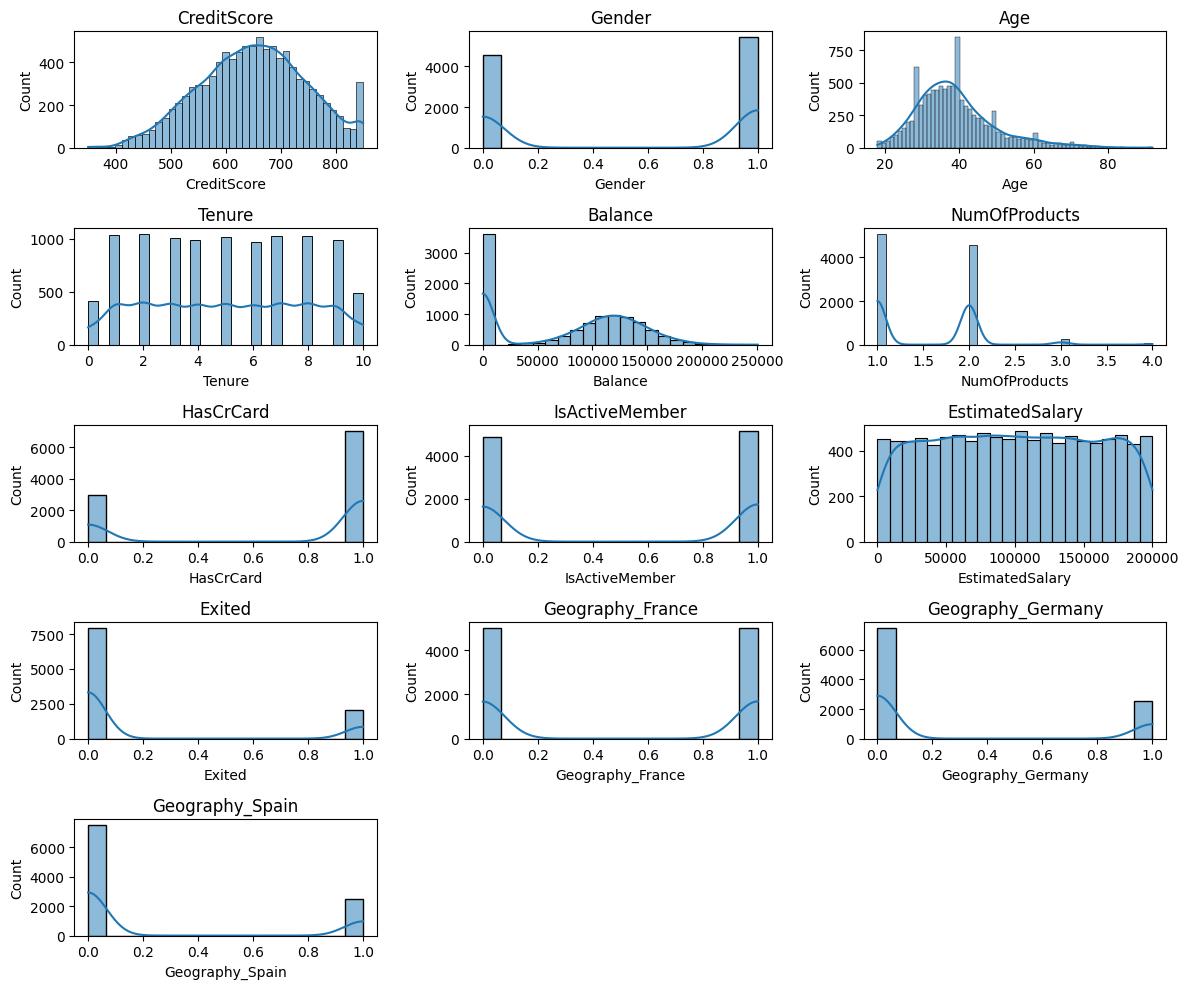

In [10]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns): # Gets columns index and name.
    plt.subplot(5, 3, i+1) # Creates a subplot grid with 2 rows and 2 columns
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
# Checks the skewness for each feature
for col in df:
    print(f'{col} = {df[col].skew()}')

CreditScore = -0.0719230679003554
Gender = -0.18344885542893252
Age = 1.0114569621064555
Tenure = 0.010493663027541667
Balance = -0.1405570727103631
NumOfProducts = 0.7455090390517491
HasCrCard = -0.9018731713018879
IsActiveMember = -0.059853699441912524
EstimatedSalary = 0.0017215835916205996
Exited = 1.4711428846564996
Geography_France = -0.005002266685737114
Geography_Germany = 1.1488783595574028
Geography_Spain = 1.1692657468341556


### **Cleaned dataset:**

In [12]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0
1,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1
2,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0
3,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0
5,645,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1,0,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9997 non-null   int64  
 1   Gender             9997 non-null   int64  
 2   Age                9997 non-null   float64
 3   Tenure             9997 non-null   int64  
 4   Balance            9997 non-null   float64
 5   NumOfProducts      9997 non-null   int64  
 6   HasCrCard          9997 non-null   float64
 7   IsActiveMember     9997 non-null   float64
 8   EstimatedSalary    9997 non-null   float64
 9   Exited             9997 non-null   int64  
 10  Geography_France   9997 non-null   int64  
 11  Geography_Germany  9997 non-null   int64  
 12  Geography_Spain    9997 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 1.1 MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,9997.0,650.520456,96.635058,350.00,584.00,652.00,718.00,850.00
Gender,9997.0,0.545664,0.497935,0.00,0.00,1.00,1.00,1.00
Age,9997.0,38.922180,10.488482,18.00,32.00,37.00,44.00,92.00
Tenure,9997.0,5.013504,2.892277,0.00,3.00,5.00,7.00,10.00
Balance,9997.0,76468.613295,62398.685712,0.00,0.00,97157.96,127638.35,250898.09
NumOfProducts,9997.0,1.530259,0.581674,1.00,1.00,1.00,2.00,4.00
HasCrCard,9997.0,0.705512,0.455835,0.00,0.00,1.00,1.00,1.00
IsActiveMember,9997.0,0.514954,0.499801,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,9997.0,100097.694156,57517.488264,11.58,50974.57,100236.02,149399.70,199992.48
Exited,9997.0,0.203761,0.402814,0.00,0.00,0.00,0.00,1.00
